# (Airline delay exploration)
## by (Hany Abdol-Aleem Ghazal)

> The dataset under investigation shows airline delays as a result of various contributing factors.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sb
import math
%matplotlib inline

In [2]:
# Loading the data
df = pd.read_csv('airline_delay_causes.csv')

In [3]:
# Displaying the data
df.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2021,1,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",110.0,1.0,0.63,0.00,...,0.0,2.0,0.0,32.0,20.0,0.0,12.0,0.0,0.0,NaN
1,2021,1,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",87.0,9.0,3.53,0.89,...,1.0,0.0,1.0,452.0,174.0,32.0,208.0,0.0,38.0,NaN
2,2021,1,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",79.0,7.0,3.87,1.00,...,0.0,0.0,0.0,969.0,351.0,541.0,77.0,0.0,0.0,NaN


In [4]:
# Dimensions of the dataframe
df.shape

(1568, 22)

In [5]:
# Removing the irrelevant no sense column
df = df.iloc[:, :-1]

In [6]:
df.isna().any().sum()

15

In [7]:
# Removing the nan rows
df.dropna(axis=0, inplace=True)

In [8]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1567 entries, 0 to 1567
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1567 non-null   int64  
 1    month               1567 non-null   int64  
 2   carrier              1567 non-null   object 
 3   carrier_name         1567 non-null   object 
 4   airport              1567 non-null   object 
 5   airport_name         1567 non-null   object 
 6   arr_flights          1567 non-null   float64
 7   arr_del15            1567 non-null   float64
 8   carrier_ct           1567 non-null   float64
 9    weather_ct          1567 non-null   float64
 10  nas_ct               1567 non-null   float64
 11  security_ct          1567 non-null   float64
 12  late_aircraft_ct     1567 non-null   float64
 13  arr_cancelled        1567 non-null   float64
 14  arr_diverted         1567 non-null   float64
 15   arr_delay           1567 non-null   f

In [9]:
# Removing white spaces in column names
df.columns = [col.strip() for col in df.columns]
df.year = df.year.astype('str')
df.month = df.month.astype('str')

In [10]:
df.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2021,1,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",110.0,1.0,0.63,0.00,...,0.0,0.0,2.0,0.0,32.0,20.0,0.0,12.0,0.0,0.0
1,2021,1,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",87.0,9.0,3.53,0.89,...,0.0,1.0,0.0,1.0,452.0,174.0,32.0,208.0,0.0,38.0
2,2021,1,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",79.0,7.0,3.87,1.00,...,0.0,0.0,0.0,0.0,969.0,351.0,541.0,77.0,0.0,0.0


### What is the structure of your dataset?

> ***The dataset is a structure containing 1567 rows and 21 columns after the initial cleaning process.***

### What is/are the main feature(s) of interest in your dataset?

> ***The main features of interest are: arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay.***

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ***The helper features as I think may be: year, month, carrier_name, airport_name, arr_flights, arr_del15, carrier_ct, weather_ct, nas_ct, security_ct and late_aircraft_ct.***

## Univariate Exploration


Text(0, 0.5, 'Frequency')

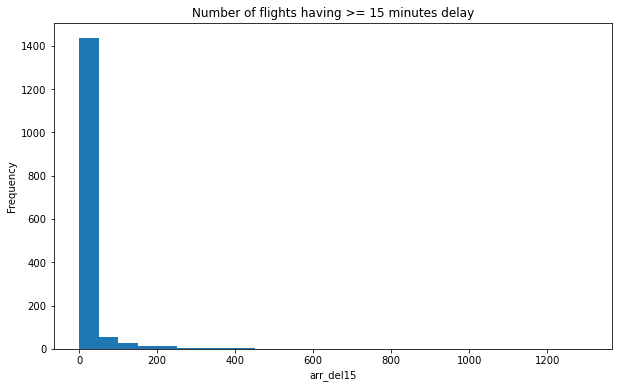

In [11]:
bins = np.arange(0, df.arr_del15.max()+50, 50)
plt.figure(figsize=[10, 6])
plt.hist(data=df, x='arr_del15', bins=bins)
plt.title('Number of flights having >= 15 minutes delay')
plt.xlabel('arr_del15')
plt.ylabel('Frequency')

> ***There is a long tail that tell us about the presence of outliers => So I will do scale transformation changing from linear to log scale to better depict tha data.***

C:\Users\drhan\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Frequency')

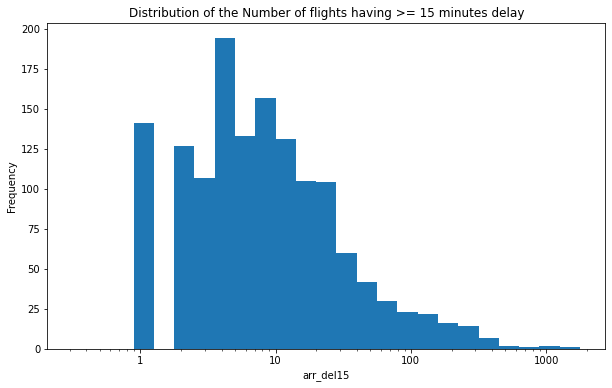

In [12]:
max = np.log10(df.arr_del15.describe())['max']
bins = 10 ** np.arange(-0.5, max+0.15, 0.15)
plt.figure(figsize=[10, 6])
plt.hist(data=df, x='arr_del15', bins=bins);
plt.xscale('log')
plt.xticks([1, 10, 100, 1000], [1, 10, 100, 1000])
plt.title('Distribution of the Number of flights having >= 15 minutes delay')
plt.xlabel('arr_del15')
plt.ylabel('Frequency')

> ***This is a right-skewed distribution of the feature arr_del15***

Text(0, 0.5, 'Frequency')

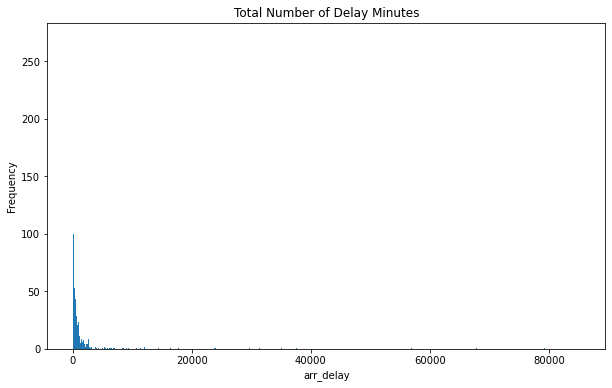

In [13]:
bins = np.arange(0, df.arr_delay.max()+50, 50)
plt.figure(figsize=[10, 6])
plt.hist(data=df, x='arr_delay', bins=bins)
plt.title('Total Number of Delay Minutes')
plt.xlabel('arr_delay')
plt.ylabel('Frequency')
# plt.xlim(0, 1500)

> ***The linear scale here makes the plot difficult to interpret.***

> ***Also there are outliers***

> ***Scale transformation using log scale is the solution.***

Text(0, 0.5, 'Frequency')

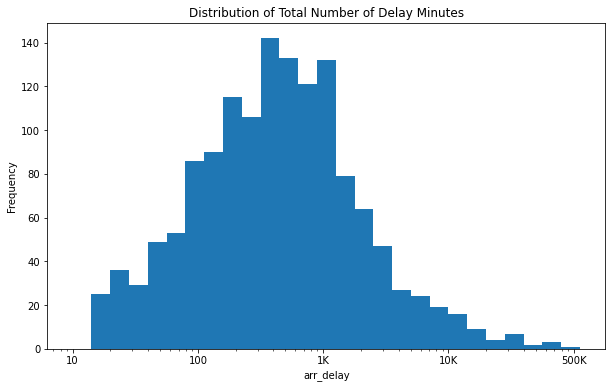

In [14]:
max = np.log10(df.arr_delay.describe())['max']
bins = 10 ** np.arange(1, max+0.15, 0.15)
plt.figure(figsize=[10, 6])
plt.hist(data=df, x='arr_delay', bins=bins);
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 1e4, 1e5], [10, 100, '1K', '10K', '500K'])
plt.title('Distribution of Total Number of Delay Minutes')
plt.xlabel('arr_delay')
plt.ylabel('Frequency')

> ***The distribution of arr_delay is normal distribution.***

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> ***The distributions of arr_del15 is right skewed.***

> ***The distributions of arr_delay is normal.***

> ***There are outliers and the plots are difficult to interpret => So we needed scale transformation changing to the log scale for better depiction of data.***

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> ***Tidy data tells that each column represents a variable => I found the last column of the dataset unnamed and has no data; so I dropped it from the dataset => This makes the data more clean and consistent.***

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0.5, 1.0, 'arr_del15 and arr_delay relationship')

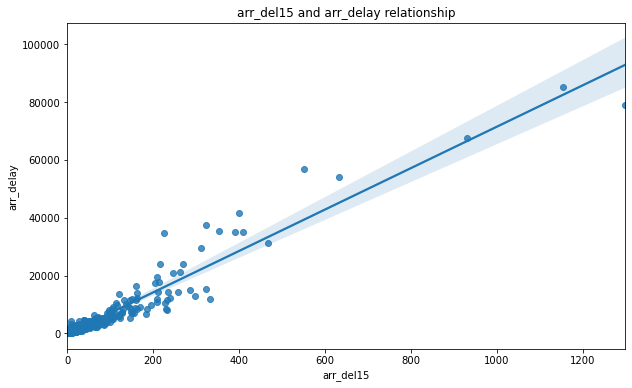

In [15]:
plt.figure(figsize=[10, 6])
sb.regplot(data=df, x='arr_del15', y='arr_delay');
# plt.xscale('log')
plt.xlabel('arr_del15')
plt.ylabel('arr_delay')
plt.title('{} and {} relationship'.format('arr_del15', 'arr_delay'))


> ***A medium positive relationship between arr_del15 and arr_delay***

> ***There is a collapse in data points that necessitates scale transformation.***

Text(0.5, 1.0, 'arr_del15 and arr_delay relationship')

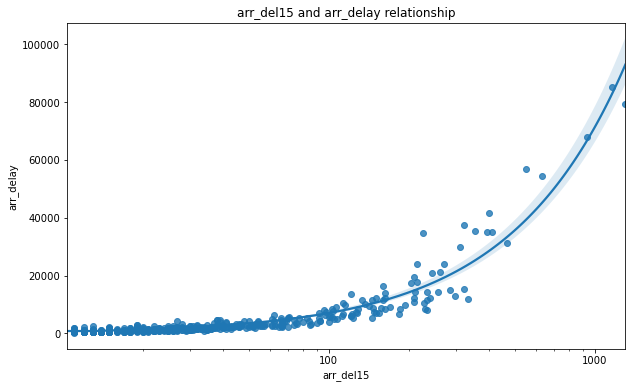

In [16]:
plt.figure(figsize=[10, 6])
sb.regplot(data=df, x='arr_del15', y='arr_delay');
plt.xscale('log')
plt.xticks([1e2, 1e3], [100, 1000])
plt.xlabel('arr_del15')
plt.ylabel('arr_delay')
plt.title('{} and {} relationship'.format('arr_del15', 'arr_delay'))


> ***Changing to log scale give better representation of data points.***

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In [18]:
def plot_pairs(dict):  
    x_vars = list(dict.values())[0]
    y_var = list(dict.keys())[0]
    length = len(x_vars)
    plt.figure(figsize=[20, 12])
    for i in range(length):
        plt.subplot(math.ceil(length/3), 3, i+1)
#         plt.scatter(data=df, x=x_vars[i], y=y_var)
        sb.regplot(data=df, x=x_vars[i], y=y_var)
        plt.xscale('log')
        plt.xlabel(x_vars[i])
        plt.ylabel(y_var)
        plt.title('{} and {} relationship'.format(x_vars[i], y_var))       

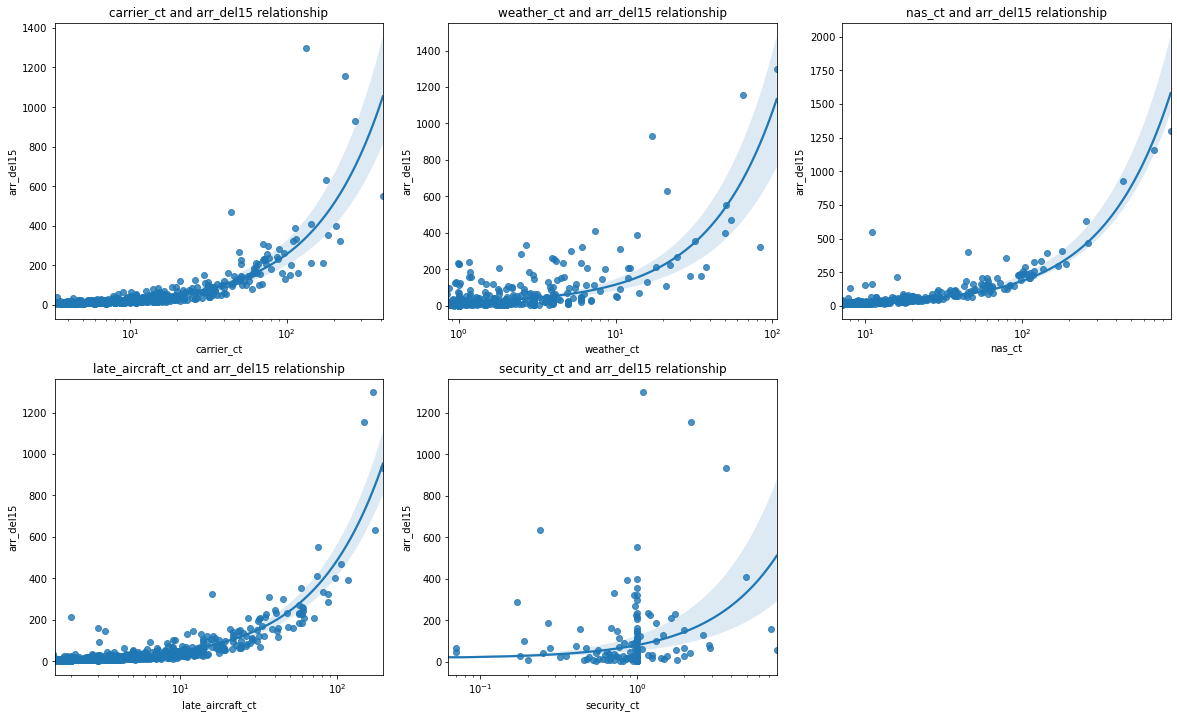

In [19]:
dict1 = {'arr_del15':['carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct', 'security_ct']}
plot_pairs(dict1)

> ***I noticed that arr_del15 feature varies with variations in carrier_ct, weather_ct, nas_ct and late_aircraft_ct more than with security_ct with a higher slope indicating a more strong positive correlation.***

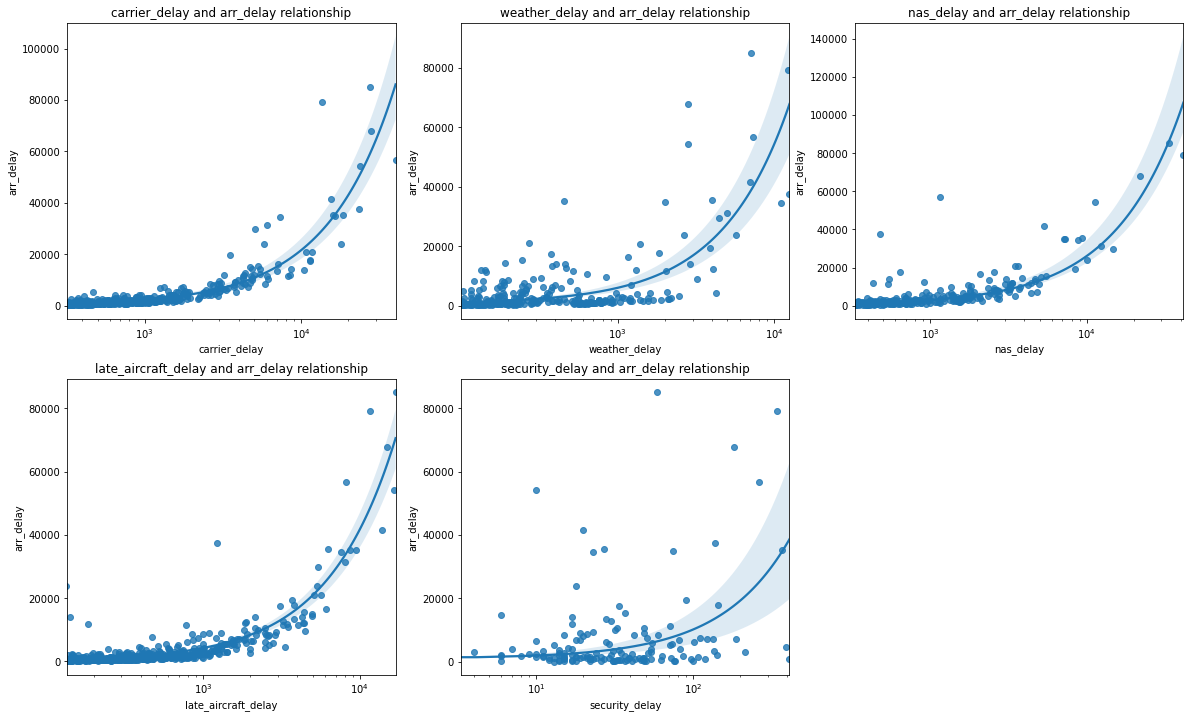

In [20]:
dict2 = {'arr_delay':['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay', 'security_delay']}
plot_pairs(dict2)

> ***I noticed that arr_delay feature varies with variations in carrier_delay, weather_delay, nas_delay and late_aircraft_delay more than with security_delay with a higher slope indicating a more strong positive correlation.***

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> ***No strong relationship between features other than the main features for example weather_delay and arr_cancelled show very weak relationship which is not an interesting one.***

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [35]:
def plot_multiple(dict_list):
    plt.figure(figsize=[20, 15])
    length = len(dict_list)
    for i in range(len(dict_list)):
        plt.subplot(math.ceil(length/2), 2, i+1)
        plt.scatter(data=df, x=dict_list[i]['x'], y=dict_list[i]['y'], c=dict_list[i]['c']);
        plt.colorbar(label=dict_list[i]['c'])
        plt.xscale('log')
        plt.xlabel(dict_list[i]['x'])
        plt.ylabel(dict_list[i]['y'])
        plt.title('Relationship between {}, {} and {}'.format(dict_list[i]['x'], dict_list[i]['y'], dict_list[i]['c']))


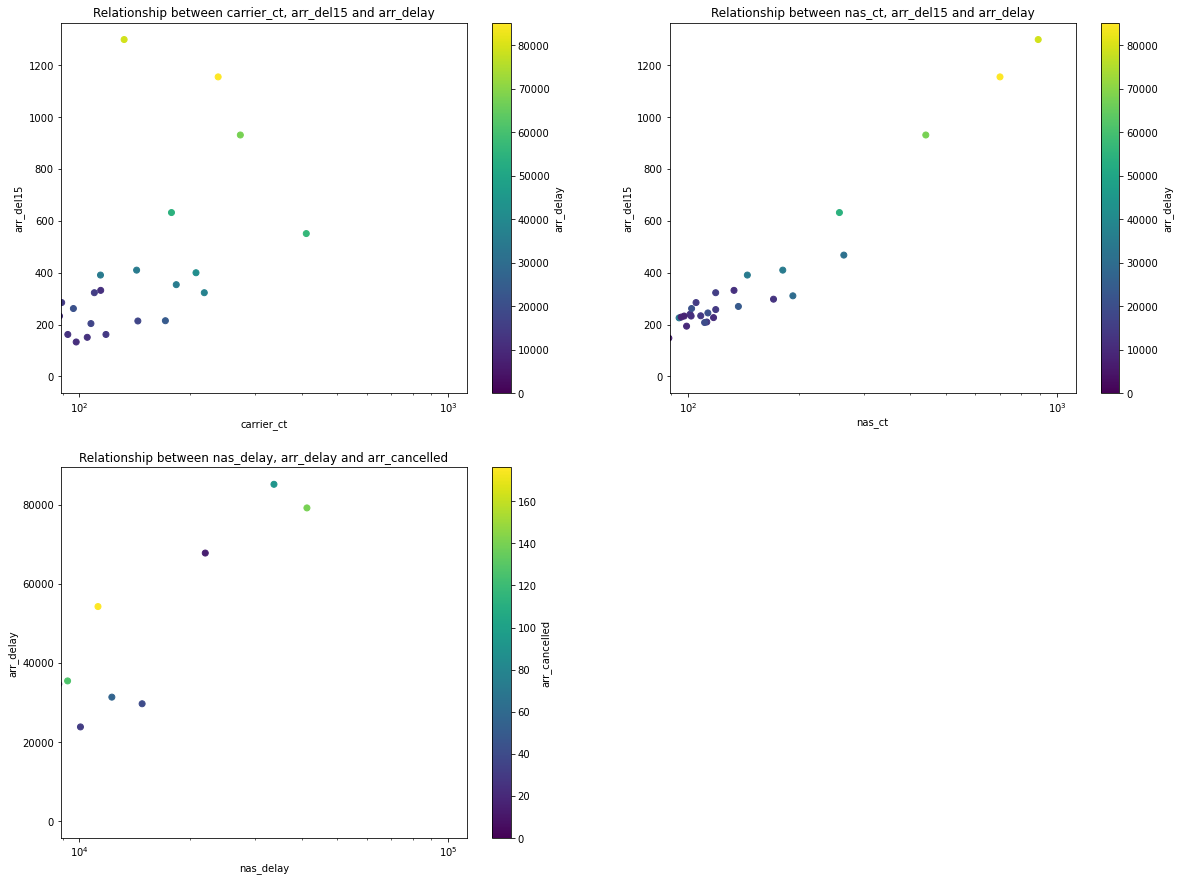

In [36]:
dict_list = [
    {'x':'carrier_ct', 'y':'arr_del15', 'c':'arr_delay'}, 
    {'x':'nas_ct', 'y':'arr_del15', 'c':'arr_delay'}, 
    {'x':'nas_delay', 'y':'arr_delay', 'c':'arr_cancelled'}
]
plot_multiple(dict_list)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> ***Relationship between carrier_ct and arr_del15 shows an intermediate effect on arr_delay as carrier_ct increased.***

> ***Relationship between carrier_delay and arr_delay shows an intermediate effect on arr_cancelled as carrier_delay increased.***

> ***Relationship between nas_ct and arr_del15 shows an strong effect on arr_delay as carrier_ct increased. => These features augment each other.***


### Were there any interesting or surprising interactions between features?

> ***No surprising interactions between features.***